Завдання

В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою. Використайте метод classification report для порівняння.

Порівняння моделей на основі однієї метрики(такої як Accuracy)- не приймається. Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

In [94]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

**нормалізація**

In [3]:
def normalize_data(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_normalized = (X - X_min) / (X_max - X_min)
    return X_normalized

def de_normalize_data(X_origin,X_normilized):
    X_min = X_origin.min(axis=0)
    X_max = X_origin.max(axis=0)
    X_de_normalized = X_min + X_normilized*(X_max - X_min)
    return X_de_normalized

**розрахунок фічей**

In [5]:
def time_domain_features(datas):
    features = {
        'x_mean': np.mean(datas['x']),
        'x_variance': np.var(datas['x']),
        'x_std_dev': np.std(datas['x']),
        'x_median': np.median(datas['x']),
        'x_max': np.max(datas['x']),
        'x_min': np.min(datas['x']),
        'x_rms': np.sqrt(np.mean(datas['x']**2)),
        'y_mean': np.mean(datas['y']),
        'y_variance': np.var(datas['y']),
        'y_std_dev': np.std(datas['y']),
        'y_median': np.median(datas['y']),
        'y_max': np.max(datas['y']),
        'y_min': np.min(datas['y']),
        'y_rms': np.sqrt(np.mean(datas['y']**2)),
        'z_mean': np.mean(datas['z']),
        'z_variance': np.var(datas['z']),
        'z_std_dev': np.std(datas['z']),
        'z_median': np.median(datas['z']),
        'z_max': np.max(datas['z']),
        'z_min': np.min(datas['z']),
        'z_rms': np.sqrt(np.mean(datas['z']**2)),
    }
    return features

In [6]:
def get_data_from_file(zip_ref: zipfile, path:str, data_type:str):
    with zip_ref.open(path) as f:
        data_from_file = pd.read_csv(f)
        data_from_file = data_from_file.rename(columns={'accelerometer_X': 'x','accelerometer_Y': 'y','accelerometer_Z': 'z'})
        features = time_domain_features(data_from_file)
        new_data = pd.DataFrame([features])
        new_data['activity'] = data_type
    return new_data

**features apply to data's**

бути, такі як середнє значення, дисперсія, стандартне відхилення та
метрика конверта, тобто медіана, максимальне та мінімальне значення діапазону, метрика основного квадрата.

2.2.1. Time domain features
We extract 17 time domain features from each window for each axis x, y and z. Guided by a previous work, the
individual features for each axis involves statistical attributes such as mean, variance, standard deviation and
envelope metrics, i.e. median, range maximum and minimum value, root main square metric. Furthermore, we use
signal magnitude area, indexes of minimum and maximum value, power, energy, entropy, skewness, kurtosis,
interquartile range, and mean absolute deviation of signal. To see the cross-relational effects of different motion
axes, we also use cross correlation of binary combinations of x, y, and 

mean, variance, standard deviation, median, range maximum and minimum value, root main square metric

In [7]:
accelerometer = pd.DataFrame()
new_data = pd.DataFrame()

zip_file_path = 'homework.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_paths = zip_ref.namelist()

    for path in all_paths:
        if path.find('data/idle')!=-1 and not path.endswith('/'):
            new_data = get_data_from_file(zip_ref,path, 'idle')
        if path.find('data/running')!=-1 and not path.endswith('/'):
            new_data = get_data_from_file(zip_ref,path, 'running')
        if path.find('data/stairs')!=-1 and not path.endswith('/'):
            new_data = get_data_from_file(zip_ref,path, 'stairs')
        if path.find('data/walking')!=-1 and not path.endswith('/'):
            new_data = get_data_from_file(zip_ref,path, 'walking')
        if not new_data.empty:
            accelerometer =  pd.concat([accelerometer, new_data], ignore_index=True)

**checking data from dataframe**

In [8]:
# accelerometer.describe()
accelerometer
# accelerometer.isna().sum()
# print(accelerometer.groupby(by='activity').describe())

,x_mean,x_variance,x_std_dev,x_median,x_max,x_min,x_rms,y_mean,y_variance,y_std_dev,...,y_min,y_rms,z_mean,z_variance,z_std_dev,z_median,z_max,z_min,z_rms,activity
0,0.178448,1.038242,1.018942,-0.102950,5.099650,-0.909797,1.034450,0.167435,1.295378,1.138147,...,-0.282516,1.150396,9.605697,0.160051,0.400064,9.770737,9.806650,8.418014,9.614024,idle
1,-0.098641,0.015310,0.123732,-0.114922,0.407014,-0.320823,0.158240,-0.131202,0.002233,0.047251,...,-0.244209,0.139451,9.771216,0.000625,0.024992,9.777920,9.806650,9.667787,9.771248,idle
2,-0.099918,0.000237,0.015379,-0.100556,-0.062249,-0.124498,0.101095,0.220905,0.000259,0.016108,...,0.177171,0.221492,9.768503,0.000204,0.014284,9.768343,9.792285,9.739613,9.768513,idle
3,0.400949,0.002704,0.052000,0.392649,0.560243,0.268151,0.404307,-0.029528,0.002874,0.053608,...,-0.205901,0.061203,9.752541,0.000312,0.017665,9.751583,9.797073,9.725247,9.752557,idle
4,0.400949,0.002735,0.052293,0.402226,0.560243,0.268151,0.404345,-0.027134,0.002819,0.053096,...,-0.205901,0.059628,9.753659,0.000345,0.018584,9.751583,9.797073,9.725247,9.753676,idle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,0.396639,11.667199,3.415728,0.390255,7.192182,-5.990292,3.438680,-10.702081,27.003355,5.196475,...,-25.201366,11.896970,-0.202230,72.607338,8.520994,0.833182,32.599450,-20.058622,8.523393,walking
6461,0.418028,12.072374,3.474532,0.390255,7.192182,-7.359776,3.499589,-10.736398,27.461855,5.240406,...,-25.201366,11.947054,-0.090980,72.760687,8.529988,0.847548,32.599450,-20.058622,8.530473,walking
6462,1.151771,15.067411,3.881676,1.501165,11.113884,-7.359776,4.048949,-10.878295,28.318995,5.321559,...,-25.201366,12.110173,0.364557,59.775759,7.731478,0.833182,32.599450,-16.903065,7.740069,walking
6463,1.551123,15.597912,3.949419,1.889025,11.113884,-7.359776,4.243100,-11.146126,27.094278,5.205216,...,-25.201366,12.301642,0.233036,60.994952,7.809926,0.768539,32.599450,-16.903065,7.813402,walking


**нормалізація та  підготовка даних**

In [22]:
# deep copy of data
normilized_accelerometer = accelerometer.copy(deep=True)

# normilizing data
for col in normilized_accelerometer.columns:
    if col != 'activity':
        normilized_accelerometer[col] = normalize_data(accelerometer[col])

X = normilized_accelerometer.drop(columns = ['activity'])
y = normilized_accelerometer['activity']

# converting text labels into digits
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#  creating train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

**будуємо модель Decision Tree**

In [87]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4,max_features=10)
dt_model.fit(X_train, y_train)

y_pred_tree = dt_model.predict(X_test)

**розраховуємо точність моделі Decision Tree**

In [88]:
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')

print(f"accuracy: {accuracy},\nprecision:{precision},\nrecall: {recall},\nf1:{f1},\nconfusion_matrix:\n {conf_matrix}")

accuracy: 0.9824742268041237,
precision:0.9869554801115386,
recall: 0.9824742268041237,
f1:0.9838709281854093,
confusion_matrix:
 [[ 308    0    0    0]
 [   0 1031    0    0]
 [   0    0   49    5]
 [   0    0   29  518]]


**готуємо перелік категорій**

In [89]:
predicted_label = label_encoder.inverse_transform(y_pred_tree)
predicted_label = set(predicted_label)

**виводимо на екран Tree**

              precision    recall  f1-score   support

      stairs       1.00      1.00      1.00       308
     walking       1.00      1.00      1.00      1031
     running       0.63      0.91      0.74        54
        idle       0.99      0.95      0.97       547

    accuracy                           0.98      1940
   macro avg       0.90      0.96      0.93      1940
weighted avg       0.99      0.98      0.98      1940



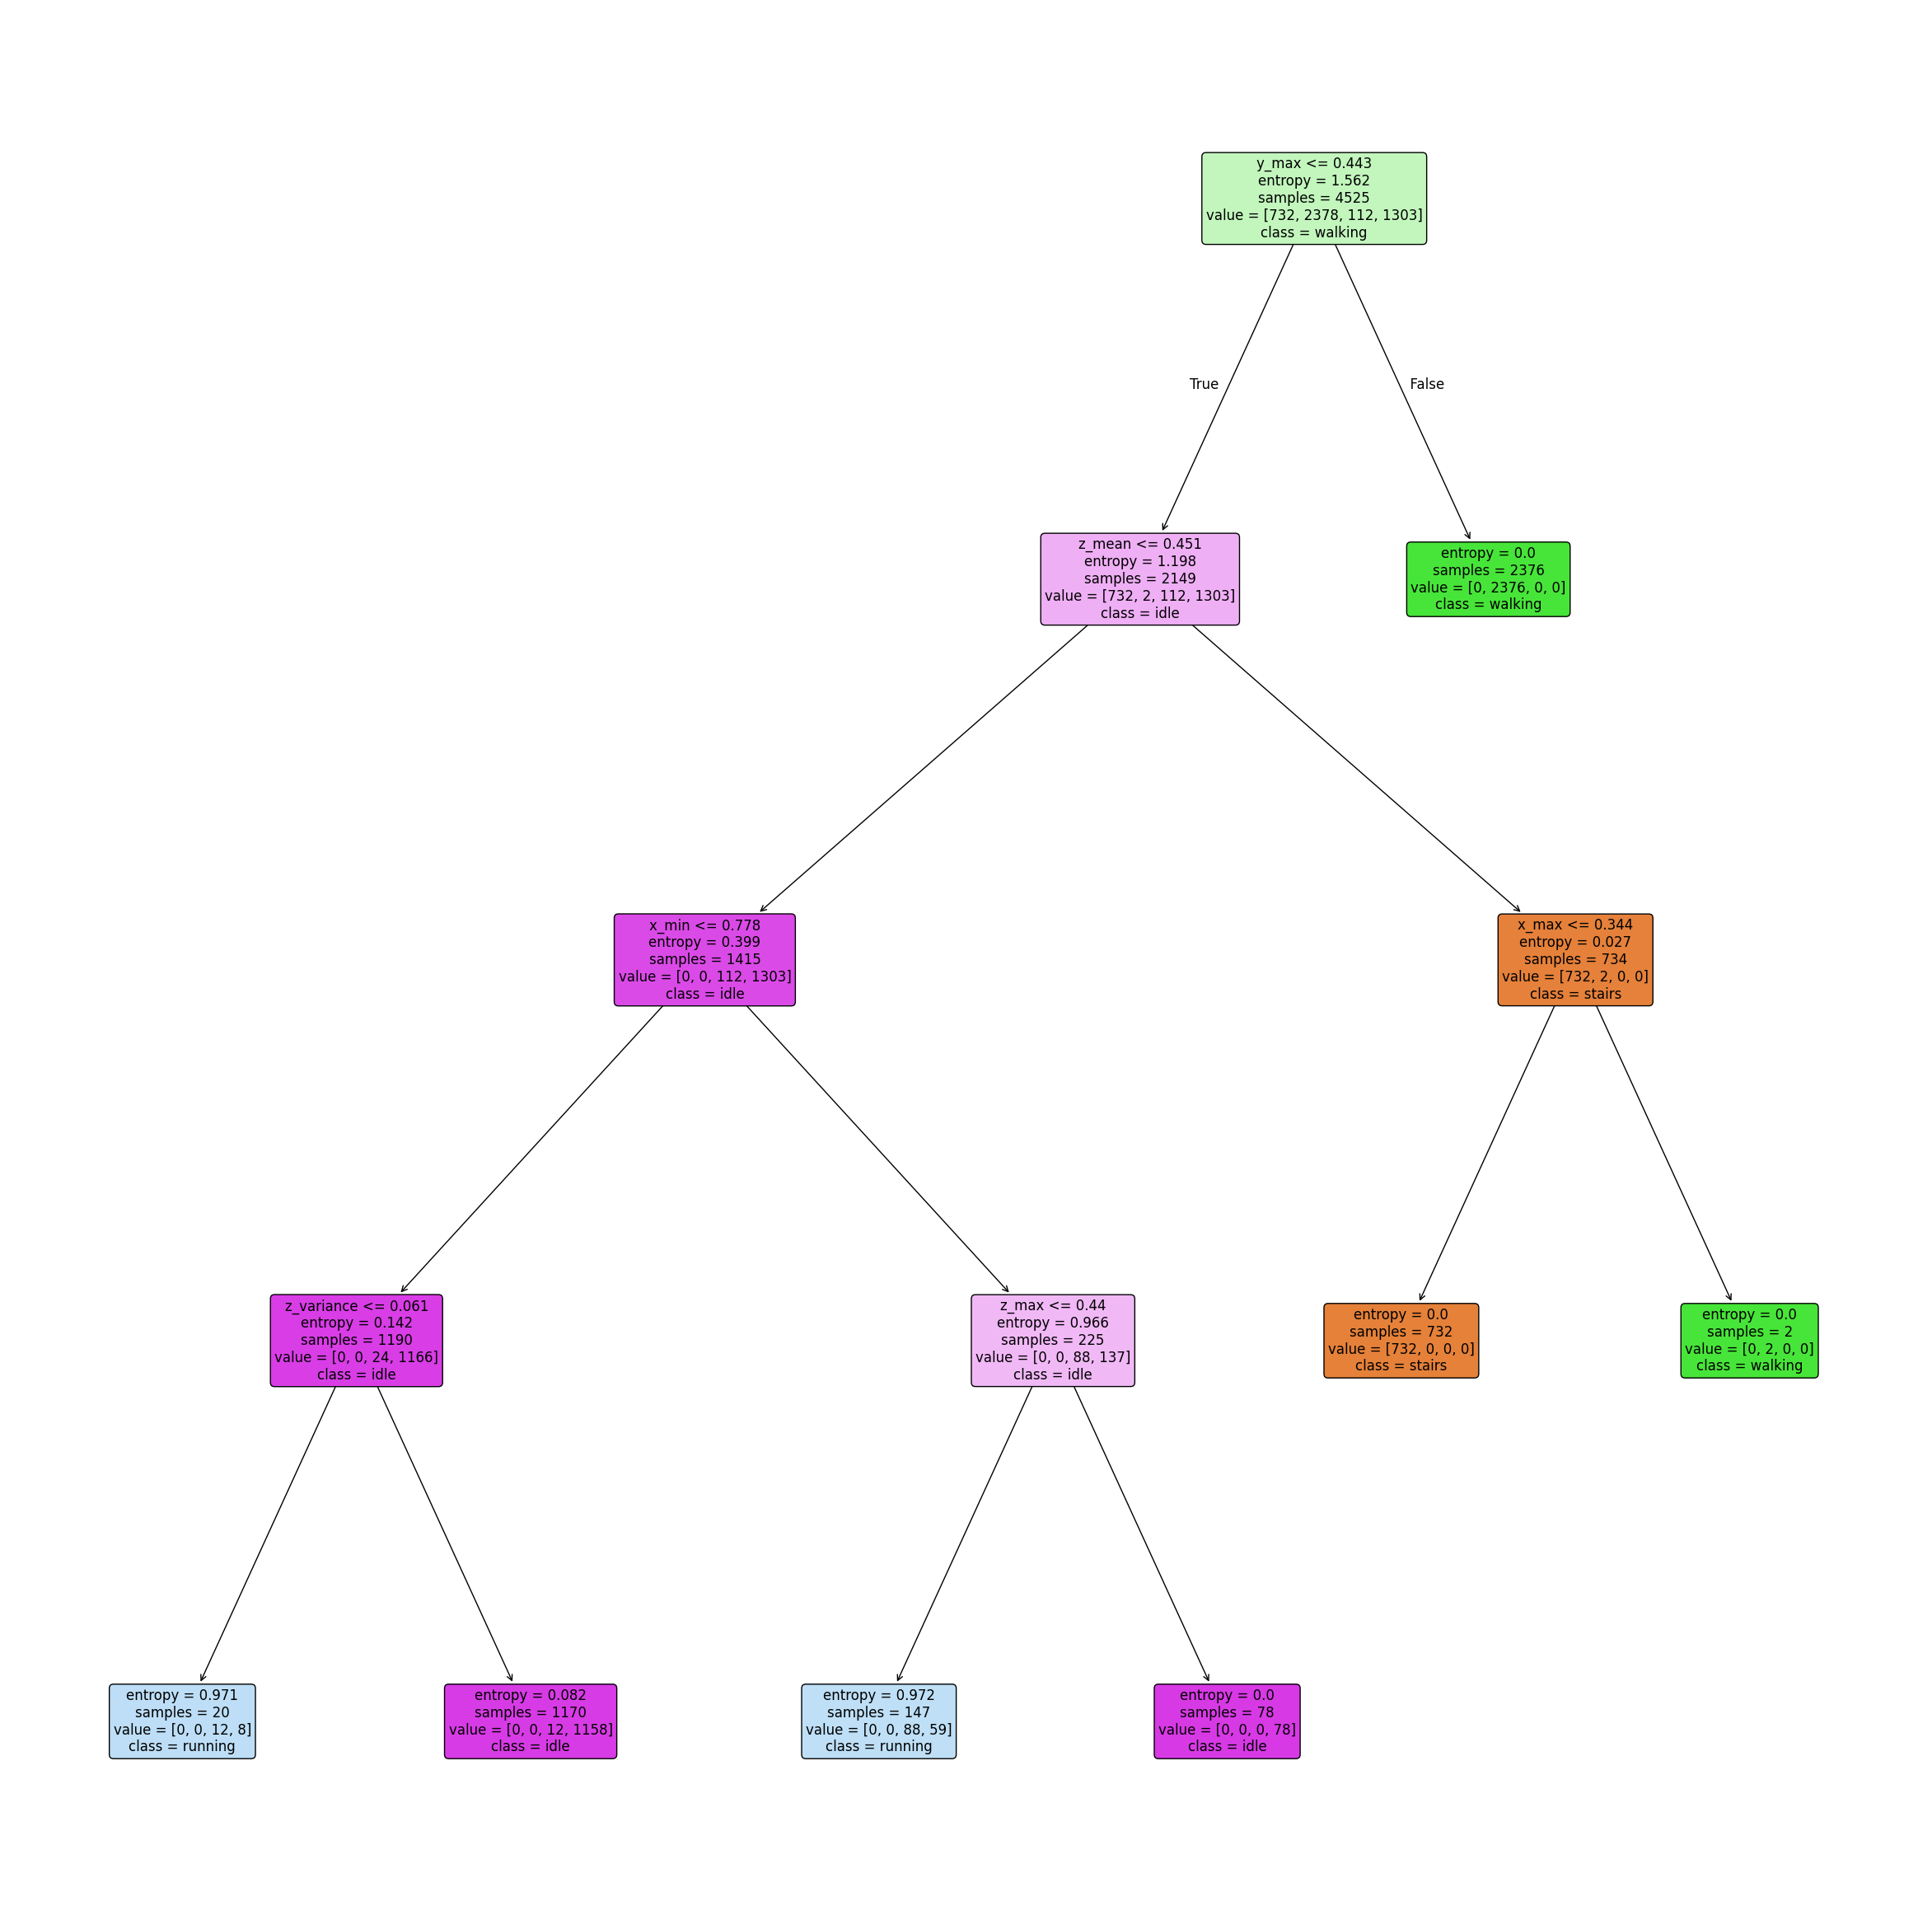

In [129]:
print(classification_report(y_true=y_test,y_pred=y_pred_tree,target_names=list(predicted_label)))

plt.figure(figsize=(30, 30))
plot_tree(dt_model, feature_names=list(X),
               class_names=list(predicted_label),
               filled=True, rounded = True, fontsize=12)
plt.show()

**будуємо модель Random Forest**

In [116]:
rf_model = RandomForestClassifier(max_depth=5,n_estimators=20,criterion='entropy',random_state=42)
rf_model.fit(X_train, y_train)

y_pred_forest = rf_model.predict(X_test)

**розраховуємо точність моделі Random Forest**

In [117]:
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest, average='weighted')
recall = recall_score(y_test, y_pred_forest, average='weighted')
f1 = f1_score(y_test, y_pred_forest, average='weighted')

print(f"accuracy: {accuracy},\nprecision:{precision},\nrecall: {recall},\nf1:{f1},\nconfusion_matrix:\n {conf_matrix}")

accuracy: 0.98659793814433,
precision:0.9872060596246919,
recall: 0.98659793814433,
f1:0.984628780667409,
confusion_matrix:
 [[ 308    0    0    0]
 [   0 1031    0    0]
 [   0    0   28   26]
 [   0    0    0  547]]


**візуалізуємо одне з дерев моделі Random Forest**

              precision    recall  f1-score   support

      stairs       1.00      1.00      1.00       308
     walking       1.00      1.00      1.00      1031
     running       1.00      0.52      0.68        54
        idle       0.95      1.00      0.98       547

    accuracy                           0.99      1940
   macro avg       0.99      0.88      0.91      1940
weighted avg       0.99      0.99      0.98      1940



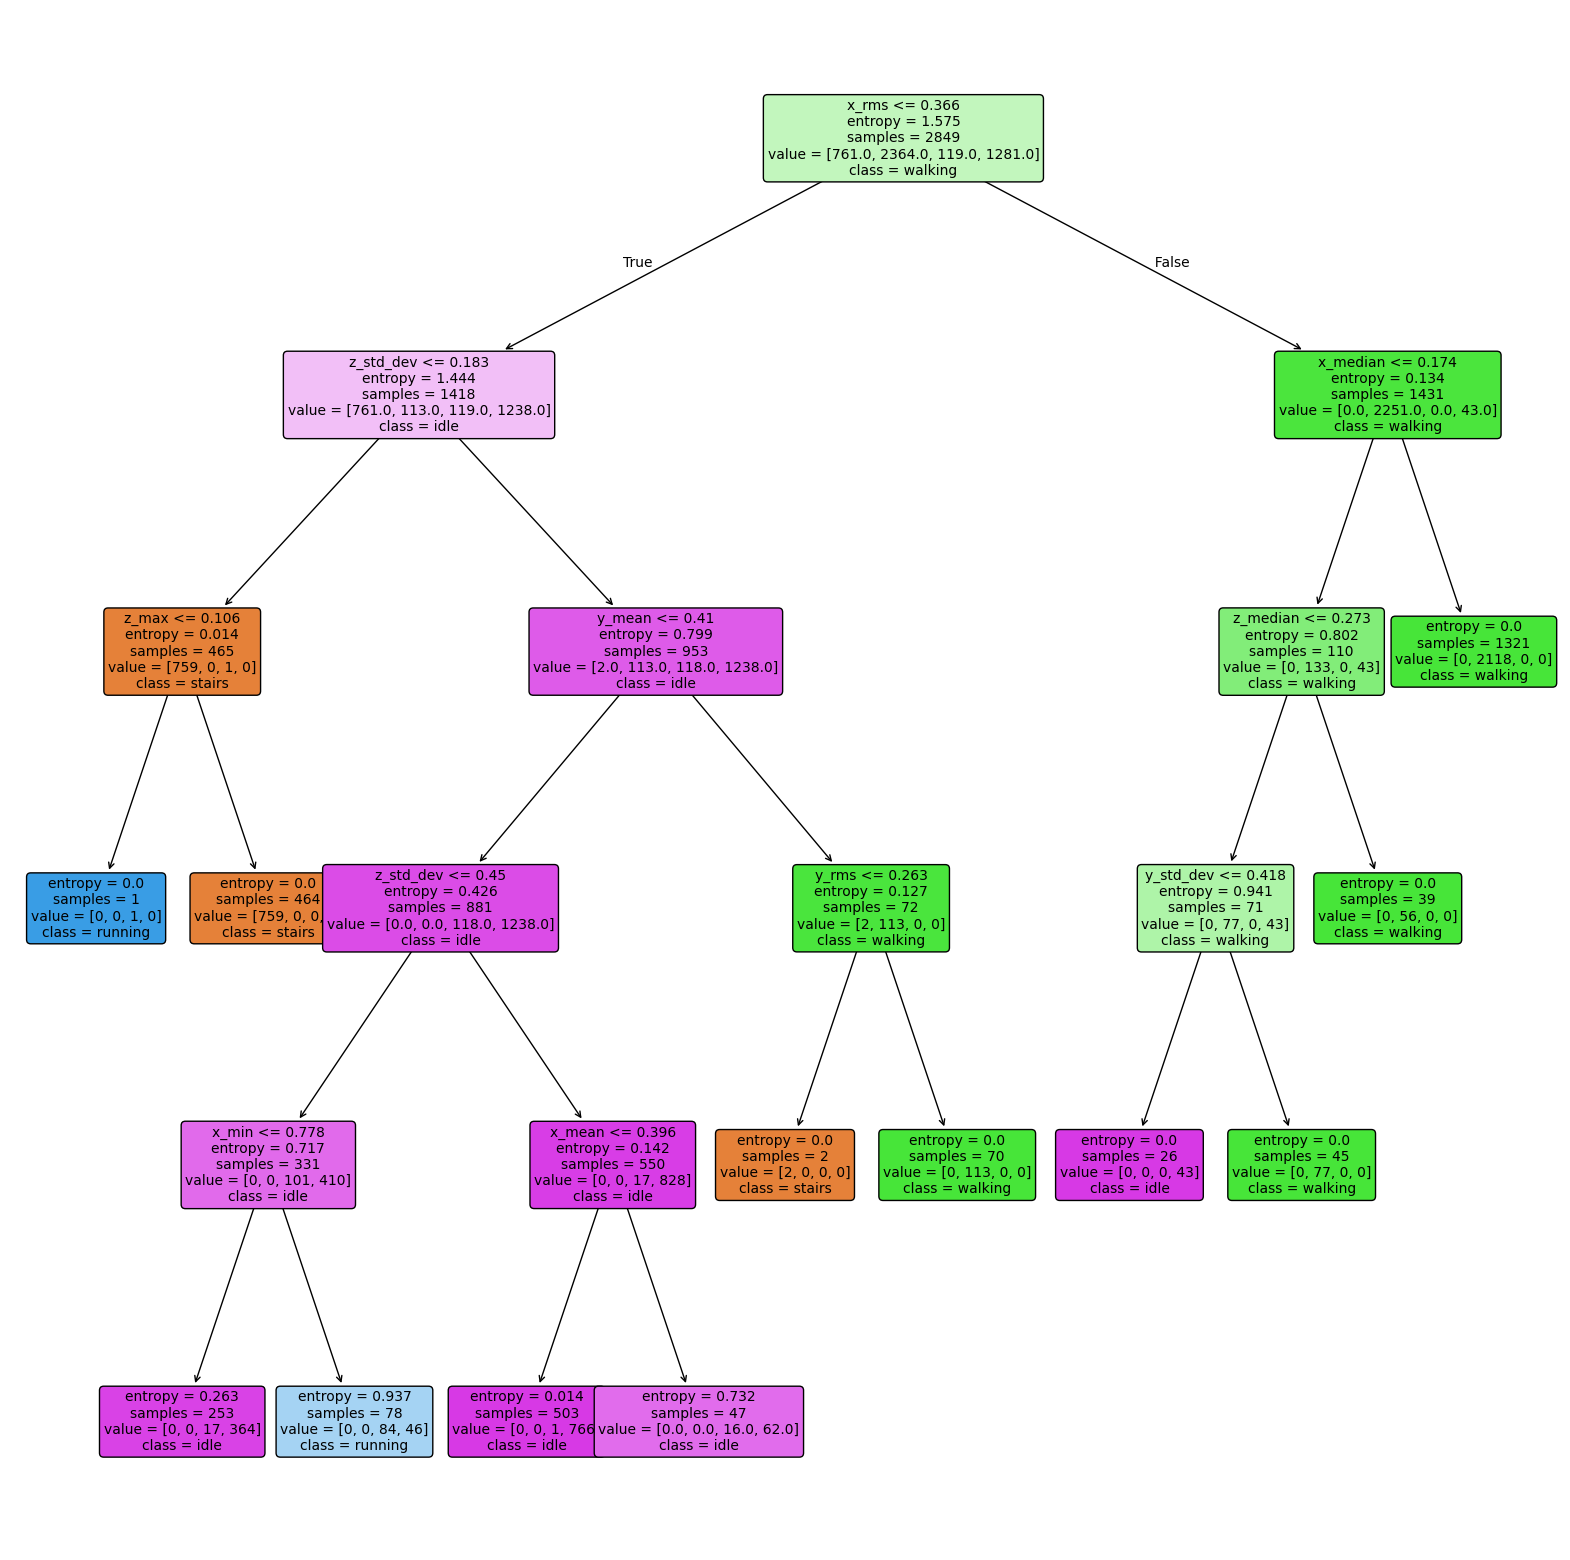

In [128]:
print(classification_report(y_true=y_test,y_pred=y_pred_forest,target_names=list(predicted_label)))

estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 20))
plot_tree(estimator, 
          feature_names=list(X),
          class_names=list(predicted_label),
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

**будуємо модель SVM**

In [122]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

**розраховуємо точність SVM**

In [123]:
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"accuracy: {accuracy},\nprecision:{precision},\nrecall: {recall},\nf1:{f1},\nconfusion_matrix:\n {conf_matrix}")

accuracy: 0.9896907216494846,
precision:0.9895203299123272,
recall: 0.9896907216494846,
f1:0.9888685637677121,
confusion_matrix:
 [[ 308    0    0    0]
 [   0 1031    0    0]
 [   0    0   36   18]
 [   0    0    2  545]]


In [125]:
print(classification_report(y_true=y_test,y_pred=y_pred_svm,target_names=list(predicted_label)))

              precision    recall  f1-score   support

      stairs       1.00      1.00      1.00       308
     walking       1.00      1.00      1.00      1031
     running       0.95      0.67      0.78        54
        idle       0.97      1.00      0.98       547

    accuracy                           0.99      1940
   macro avg       0.98      0.92      0.94      1940
weighted avg       0.99      0.99      0.99      1940

